In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn import linear_model  # sklearn으로 logistic 구현
from sklearn.preprocessing import MinMaxScaler  # 정규화 진행
from scipy import stats #이상치 처리
import matplotlib.pyplot as plt

In [2]:
import warnings
warnings.filterwarnings(action='ignore')

In [3]:
# data loading
df = pd.read_csv('C:/jupyter_home/data/admission.csv')
display(df.head())

,admit,gre,gpa,rank
0,0,380,3.61,3
1,1,660,3.67,3
2,1,800,4.00,1
3,1,640,3.19,4
4,0,520,2.93,4


In [4]:
#preprocessing
# 결측치 처리
df.isnull().sum()
# 결측치 없음!

admit    0
gre      0
gpa      0
rank     0
dtype: int64

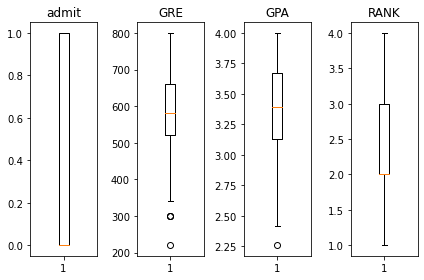

In [5]:
# 이상치 처리
# 종속변수의 이상치=outlier, 독립변수의 이상치= 지대값
figure = plt.figure()
ax1 = figure.add_subplot(1,4,1)
ax2 = figure.add_subplot(1,4,2)
ax3 = figure.add_subplot(1,4,3)
ax4 = figure.add_subplot(1,4,4)
ax1.set_title('admit')
ax2.set_title('GRE')
ax3.set_title('GPA')
ax4.set_title('RANK')

ax1.boxplot(df['admit'])
ax2.boxplot(df['gre'])
ax3.boxplot(df['gpa'])
ax4.boxplot(df['rank'])

figure.tight_layout()
plt.show()

# 이상치 존재 z-score이용해서 이상치 제거 

In [6]:
print(df.shape)  #(400, 4)

# 이상치 제거 
zscore_threshold = 2.0

for col in df.columns:
    #print(np.abs(stats.zscore(df[col])))
    outlier = df[col][np.abs(stats.zscore(df[col]))>zscore_threshold]
    df = df.loc[~df['gre'].isin(outlier)]
    
print(df.shape)   #(392, 4)   

(400, 4)
(392, 4)


In [7]:
# 정규화 
x_data = df.drop('admit',axis=1,inplace=False)
display(x_data.head())
t_data = df['admit'].values.reshape(-1,1)

scaler = MinMaxScaler()
scaler.fit(x_data)

norm_x_data = scaler.transform(x_data)
print(norm_x_data)

,gre,gpa,rank
0,380,3.61,3
1,660,3.67,3
2,800,4.00,1
3,640,3.19,4
4,520,2.93,4


[[0.04545455 0.77586207 0.66666667]
 [0.68181818 0.81034483 0.66666667]
 [1.         1.         0.        ]
 ...
 [0.22727273 0.21264368 0.33333333]
 [0.77272727 0.79885057 0.33333333]
 [0.54545455 0.93678161 0.66666667]]


In [8]:
## sklearn 구현
model = linear_model.LogisticRegression()
model.fit(x_data,t_data)
my_score = np.array([[600,3.8,1]])
predict_val = model.predict(my_score)   #0 or 1로 결과 도출
predict_proba = model.predict_proba(my_score)  # 확률값으로 결과 도출

print('sklearn의 결과: 합격여부:{} , 확률:{}'.format(predict_val,predict_proba))

sklearn의 결과: 합격여부:[1] , 확률:[[0.43564749 0.56435251]]


In [9]:
# tensorflow 구현

# placeholder
X = tf.placeholder(shape=[None,3], dtype=tf.float32)
T = tf.placeholder(shape=[None,1], dtype=tf.float32)

# weight & bias
W = tf.Variable(tf.random.normal([3,1]))
b = tf.Variable(tf.random.normal([1]))

# hypothesis, model, predict model, logistic regression model
logit = tf.matmul(X,W) + b
H = tf.sigmoid(logit)

# loss function, cross entropy, log loss라고 하기도 함
loss =  tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(logits=logit,
                                                              labels=T))

#train
train = tf.train.GradientDescentOptimizer(learning_rate = 1e-4).minimize(loss)

# session, 초기화
sess = tf.Session()
sess.run(tf.global_variables_initializer())

# 반복학습
for step in range(300000):
    _, loss_val = sess.run([train,loss],feed_dict={X:norm_x_data, T:t_data})
    
    if step % 30000==0:
        print('loss의 값:{}'.format(loss_val))
        
#predict
my_score = np.array([[600,3.8,1]])
norm_my_score = scaler.transform(my_score)
result = sess.run(H, feed_dict={X:norm_my_score})
print('tensorflow로 예측한 결과:{}'.format(result))


Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



loss의 값:0.8069518804550171
loss의 값:0.6620033383369446
loss의 값:0.645420253276825
loss의 값:0.6372449994087219
loss의 값:0.6304810047149658
loss의 값:0.6245693564414978
loss의 값:0.6193606853485107
loss의 값:0.6147692799568176
loss의 값:0.6107181906700134
loss의 값:0.6071361899375916
tensorflow로 예측한 결과:[[0.42562807]]


## metrics

In [11]:
from sklearn.model_selection import train_test_split

# data loading
df = pd.read_csv('c:/jupyter_home/data/ozone.csv')
display(df.head())
# 결측치 제거
training_data = df.dropna(how='any',inplace=False)

# 이상치 제거
zscore_threshold = 2.0

for col in training_data.columns:
    outlier = training_data[col][np.abs(stats.zscore(training_data[col]))>zscore_threshold]
    training_data = training_data.loc[~training_data[col].isin(outlier)]
    
#sklearn으로 구현해서 정규화는 안함
display(training_data.head())

,Ozone,Solar.R,Wind,Temp,Month,Day
0,41.0,190.0,7.4,67,5,1
1,36.0,118.0,8.0,72,5,2
2,12.0,149.0,12.6,74,5,3
3,18.0,313.0,11.5,62,5,4
4,NaN,NaN,14.3,56,5,5


,Ozone,Solar.R,Wind,Temp,Month,Day
0,41.0,190.0,7.4,67,5,1
1,36.0,118.0,8.0,72,5,2
2,12.0,149.0,12.6,74,5,3
3,18.0,313.0,11.5,62,5,4
6,23.0,299.0,8.6,65,5,7


In [12]:
#data set
x_data = training_data[['Solar.R','Wind','Temp']].values
t_data = training_data['Ozone'].values.reshape(-1,1)

# Train / Validation data set
train_x_data, valid_x_data, train_t_data,valid_t_data = train_test_split(x_data,
                                                                         t_data,
                                                                         test_size=0.3,
                                                                         random_state=2)

In [13]:
# 모델 생성, 학습
model = linear_model.LinearRegression()
model.fit(train_x_data,train_t_data)

LinearRegression()

In [14]:
# 예측값(predict_value), 정답(valid_t_data)
predict_value = model.predict(valid_x_data)
# 예측값과 정답의 차이가 작을수록 좋음

In [15]:
from sklearn.metrics import mean_absolute_error
print(mean_absolute_error(valid_t_data,predict_value))
# 13.924465776324642

13.924465776324642


In [17]:
from sklearn.metrics import mean_squared_error
print(mean_squared_error(valid_t_data,predict_value))
# 271.5671192367061

271.5671192367061


In [19]:
from sklearn.metrics import r2_score
print(r2_score(valid_t_data,predict_value))
# 0.3734728354920861

0.3734728354920861
